# Project 1 - Cardio Good Fitness
# Trisha Flores

In [185]:
#Library to suppress warning
import warnings
warnings.filterwarnings('ignore')

#Libraries to help read/manipulate data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries to hlep with data visualization
import seaborn as sns
%matplotlib inline

#imported to see skewness
from scipy.stats import skew,norm,probplot,boxcox,f_oneway

#imported to change figure size
from matplotlib import rcParams

In [2]:
#Import csv file from .. as cardio using pandas
cardio = pd.read_csv('CardioGoodFitness.csv')

In [3]:
#Find out the details of the dataset: shape,describe,columns,range,data types
cardio.shape

(180, 9)

In [4]:
#Take a peek at the data, first 5 rows, to get a feel of what's captured
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
#Go ahead and print out columns, may be useful for copy and paste later
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [14]:
#Get a count of the data types
cardio.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [13]:
#Understand what data type each column is and range of entries
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [19]:
#Want to change the object types to actual category type for analysis
cardio['Product'] = cardio.Product.astype('category')
cardio['Gender'] = cardio.Gender.astype('category')
cardio['MaritalStatus'] = cardio.MaritalStatus.astype('category')
#Check the numbers after change
cardio.dtypes.value_counts()

int64       6
category    1
category    1
category    1
dtype: int64

In [20]:
#Verify the change in data types...looks good
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [12]:
#Get the statistical summary of the numerical data...get an idea of the spread
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Age: Mean age is 28.7 and std is ~ 7, so max of 50 is definitely an outlier
# Education: 15.5 years is mean and std is only 1, Max 21, so seems pretty clustered together
# Usage and Fitness: Also seem normal distribution from the description
# Income: Higher std but bigger numbers, still Max appears to be an outlier
# Miles: Also seems to favor a max outlier

In [17]:
#Get a description of the categorical data
cardio.describe(exclude='number')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [15]:
#From EDA-CaseStudy_and_PandasProfiling lesson/python notebook 
#Check for missing data in each column

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(cardio)

,Total,Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


# No missing data 

In [21]:
#select_dtypes()- returns a subset of the dataframe based on the data types that are provided in the 'include' parameter.
#Getting a printo of just the numerical column names for the skew lambda function
num_sel=cardio.select_dtypes(include=["int64"])
num_sel.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [23]:
#Check for skewness
skewed_ = num_sel.apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
skewed_

Miles        1.710092
Income       1.280995
Age          0.973957
Usage        0.733318
Education    0.617096
Fitness      0.451001
dtype: float64

# If measuring right skew as > 0.7 Miles, Income, Age, and Usage are all right skewed...outliers.  If ingesting into a model need transforming?

In [24]:
cardio.mad()

Age              5.615679
Education        1.254568
Usage            0.882963
Fitness          0.765432
Income       11925.873333
Miles           37.208333
dtype: float64

# Mean absolute deviation, most columns seem to have an reasonable deviation.

In [168]:
# function to create labeled barplots, pulled from Uber case study, thanks (added save figure)


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="rocket",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.savefig('out8.jpg',bbox_inches='tight')
    plt.show()  # show the plot

<Figure size 1080x504 with 0 Axes>

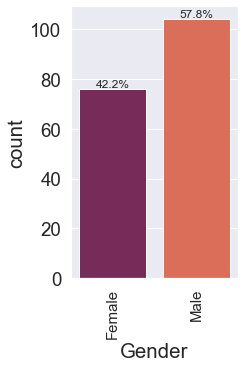

In [169]:
#Count plot of gender
plt.figure(figsize=(15,7))
labeled_barplot(cardio, 'Gender', perc=True)
#plt.savefig('out8.jpg',bbox_inches='tight')


# Greater male customers, though by only 7.8%

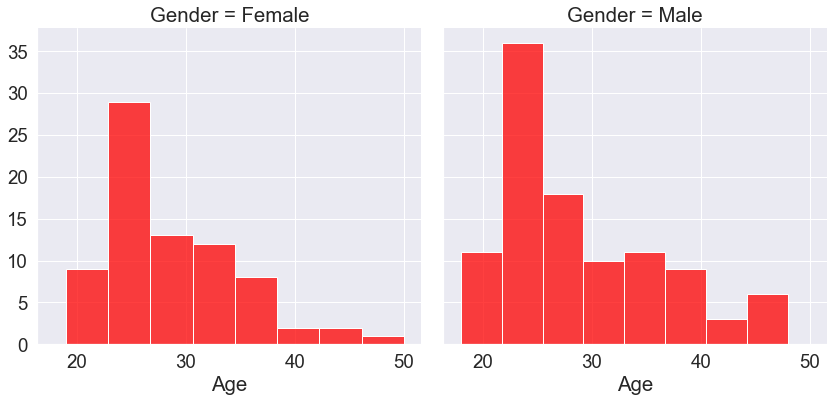

In [189]:
#Used help on seaborn.pydata.org to do a FacetGrid in order to show multiple plots 
#Want to do univariate analysis but have multiple plot on each slide for powerpoint
sns.set(font_scale=1.7)

g=sns.FacetGrid(cardio,col='Gender',height=6,aspect=1)

g.map(''''''''sns.histplot,'Age',color='red''''''''')
g.set_axis_labels('Age')
plt.savefig('out1.jpg',bbox_inches='tight')
plt.show()

# Most of the count (for both sexes) around 20-35, though both are right skewed.  Higher numbers in general of Men, even in the right skew

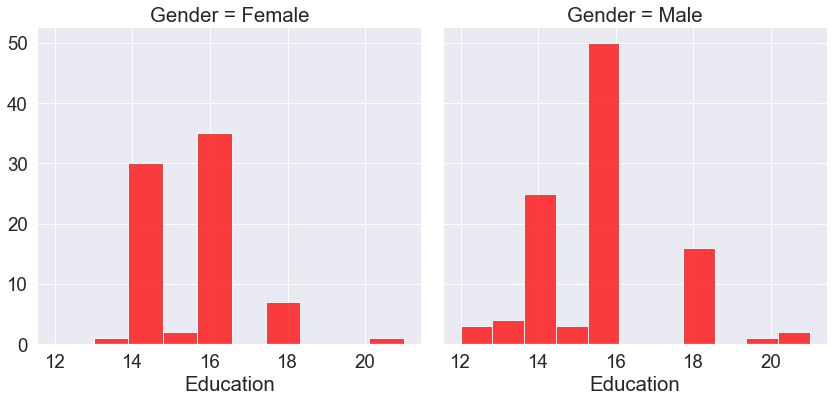

In [129]:
g=sns.FacetGrid(cardio,col='Gender',height=6,aspect=1)

g.map(sns.histplot,'Education',color='red')
g.set_axis_labels('Education')
plt.savefig('out2.jpg',bbox_inches='tight')
plt.show()

# Education years for both sexes 14-16 years though some accumulation of 18 years

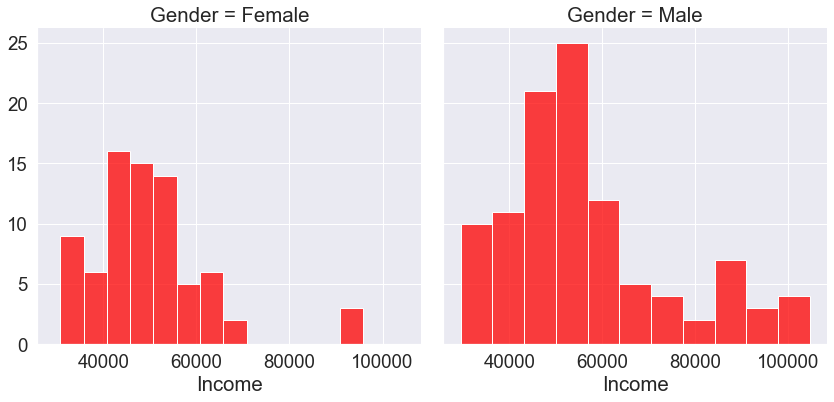

In [128]:
g=sns.FacetGrid(cardio,col='Gender',height=6,aspect=1)

g.map(sns.histplot,'Income',color='red')
g.set_axis_labels('Income')
plt.savefig('out3.jpg',bbox_inches='tight')
plt.show()

# Again similar distribution for male and female with income clustered around 35000 to 60000, right skewed

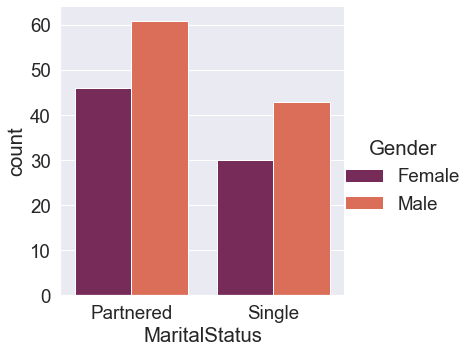

In [158]:
sns.catplot(x='MaritalStatus',kind='count', hue='Gender',palette='rocket',data=cardio)
plt.savefig('out4.jpg',bbox_inches='tight')
plt.show()

# More customers are partnered compared to single for both sexes

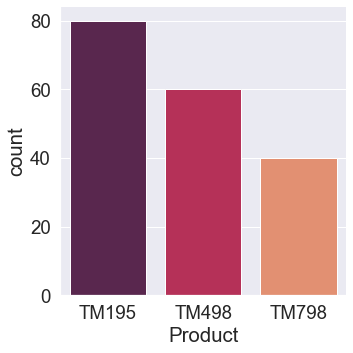

In [159]:
sns.catplot(x='Product',kind='count', palette='rocket',data=cardio)
plt.savefig('out5.jpg',bbox_inches='tight')
plt.show()

# Most customers have the TM195, then TM498, and less users have TM798 (about half compared to TM195)

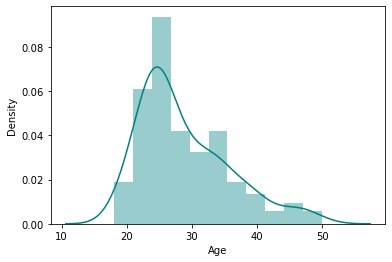

In [37]:
#Testing out another view of age, not adding in the category hue
sns.distplot(cardio['Age'],color='teal')
plt.show()

In [187]:
#Grouping the means by categories to get more insight
cardio.groupby(by=['Product','Gender']).mean()

Age  Education     Usage   Fitness        Income  \
Product Gender                                                           
TM195   Female  28.450000  15.100000  2.900000  2.875000  46020.075000   
        Male    28.650000  14.975000  3.275000  3.050000  46815.975000   
TM498   Female  29.103448  15.206897  3.137931  2.862069  49336.448276   
        Male    28.709677  15.032258  3.000000  2.935484  48634.258065   
TM798   Female  27.000000  17.857143  5.000000  4.571429  73633.857143   
        Male    29.545455  17.212121  4.727273  4.636364  75825.030303   

                     Miles  
Product Gender              
TM195   Female   76.200000  
        Male     89.375000  
TM498   Female   87.344828  
        Male     88.483871  
TM798   Female  180.000000  
        Male    164.121212

# Ages and education similar across all 3 products
# TM195 and 498 are similar all the way across but TM798 has higher averages in Usage, Fitness, Income, and Miles

In [39]:
cardio.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


# Highest correlation between education and income;  miles and usage; fitness and miles
# Correlation between usage and income; fitness and income;  miles and income; age and income
# No negative correlations


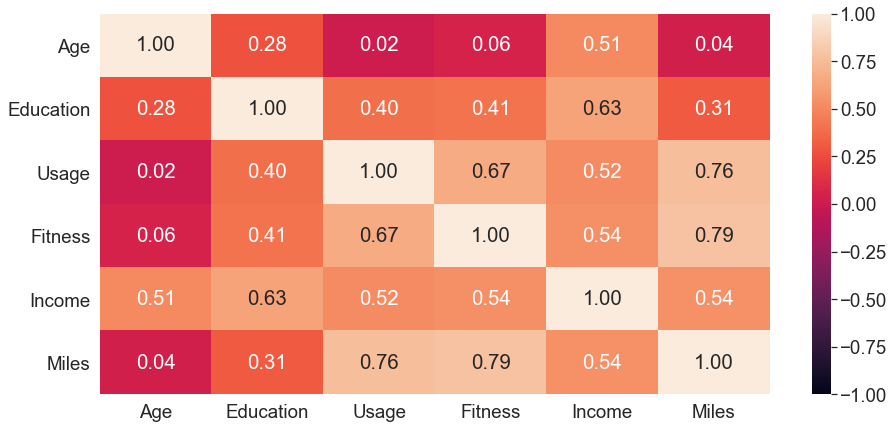

In [140]:
# Check for correlation among numerical variables
num_col = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
corr = cardio[num_col].corr()

# plot the heatmap to visualize the correlations

plt.figure(figsize=(15, 7))
#sns.color_palette('rocket')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig('out6.jpg',bbox_inches='tight')
plt.show()

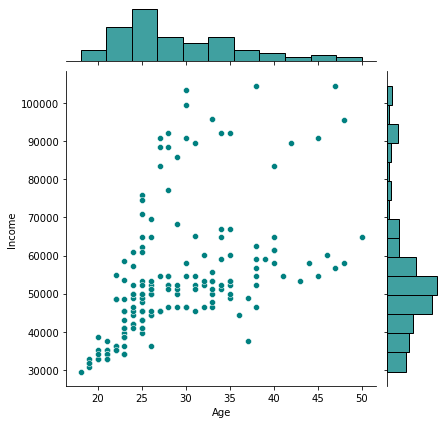

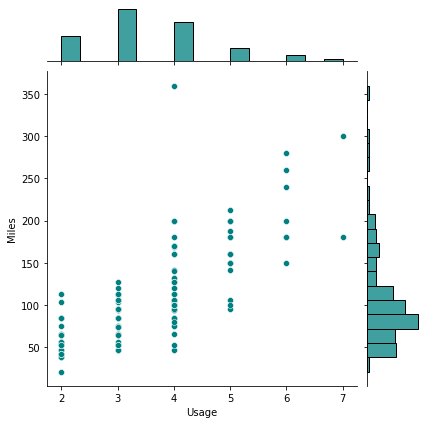

In [50]:
#Try some bivariate jointplots to visualize and look for the correlations
sns.jointplot(cardio['Age'],cardio['Income'], color='teal')
plt.show()
sns.jointplot(cardio['Usage'],cardio['Miles'], color='teal')
plt.show()

# Not really standing out for analysis

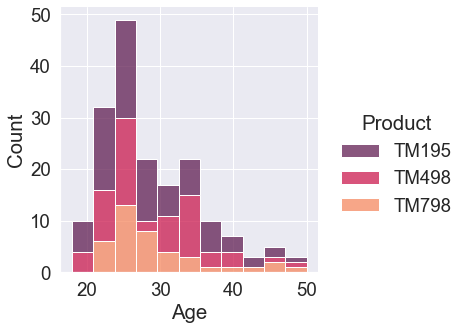

In [190]:
#Distribution plots using each metric with Product as a hue to visualize usage of the product by different types
sns.displot(cardio,x='Age',hue='Product', palette='rocket',multiple='stack')
plt.savefig('out7.jpg',bbox_inches='tight')
plt.show()

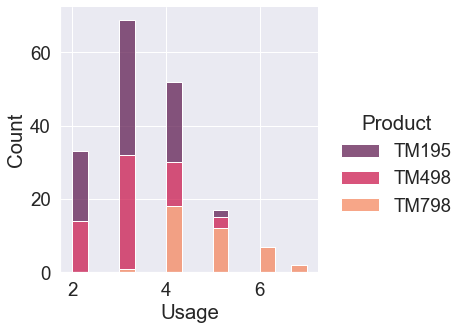

In [170]:
sns.displot(cardio,x='Usage',hue='Product', palette='rocket', multiple='stack')
plt.savefig('out9.jpg',bbox_inches='tight')
plt.show()

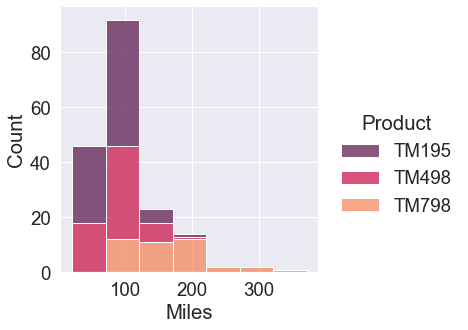

In [184]:
sns.displot(cardio,x='Miles',hue='Product', palette='rocket',multiple='stack',binwidth=50)
plt.savefig('out10.jpg',bbox_inches='tight')
plt.show()

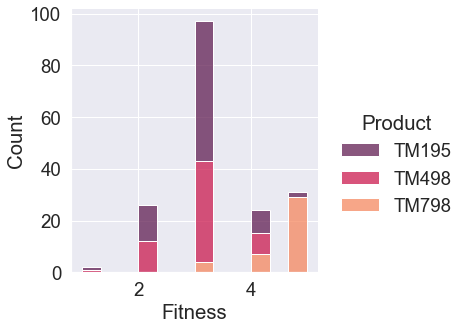

In [172]:
sns.displot(cardio,x='Fitness',hue='Product', palette='rocket',multiple='stack')
plt.savefig('out11.jpg',bbox_inches='tight')
plt.show()

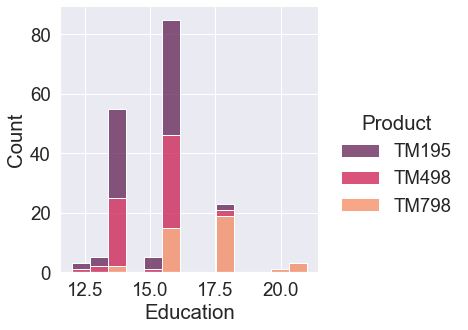

In [173]:
sns.displot(cardio,x='Education',hue='Product', palette='rocket',multiple='stack')
plt.savefig('out12.jpg',bbox_inches='tight')
plt.show()

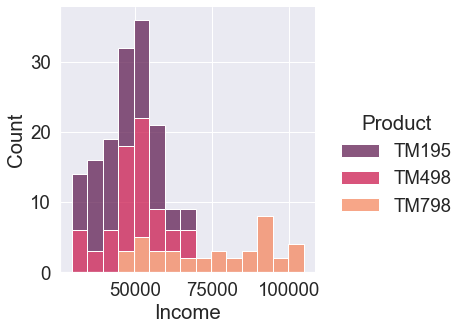

In [174]:
sns.displot(cardio,x='Income',hue='Product', palette='rocket',multiple='stack')
plt.savefig('out13.jpg',bbox_inches='tight')
plt.show()

# The same observations from the mean grouped by product are seen in these distplots.  You can really see the TM195 and TM498 grouped in the same regions, with TM798 spreading out to the right.  
# The higher numbers of the TM195 are also apparent

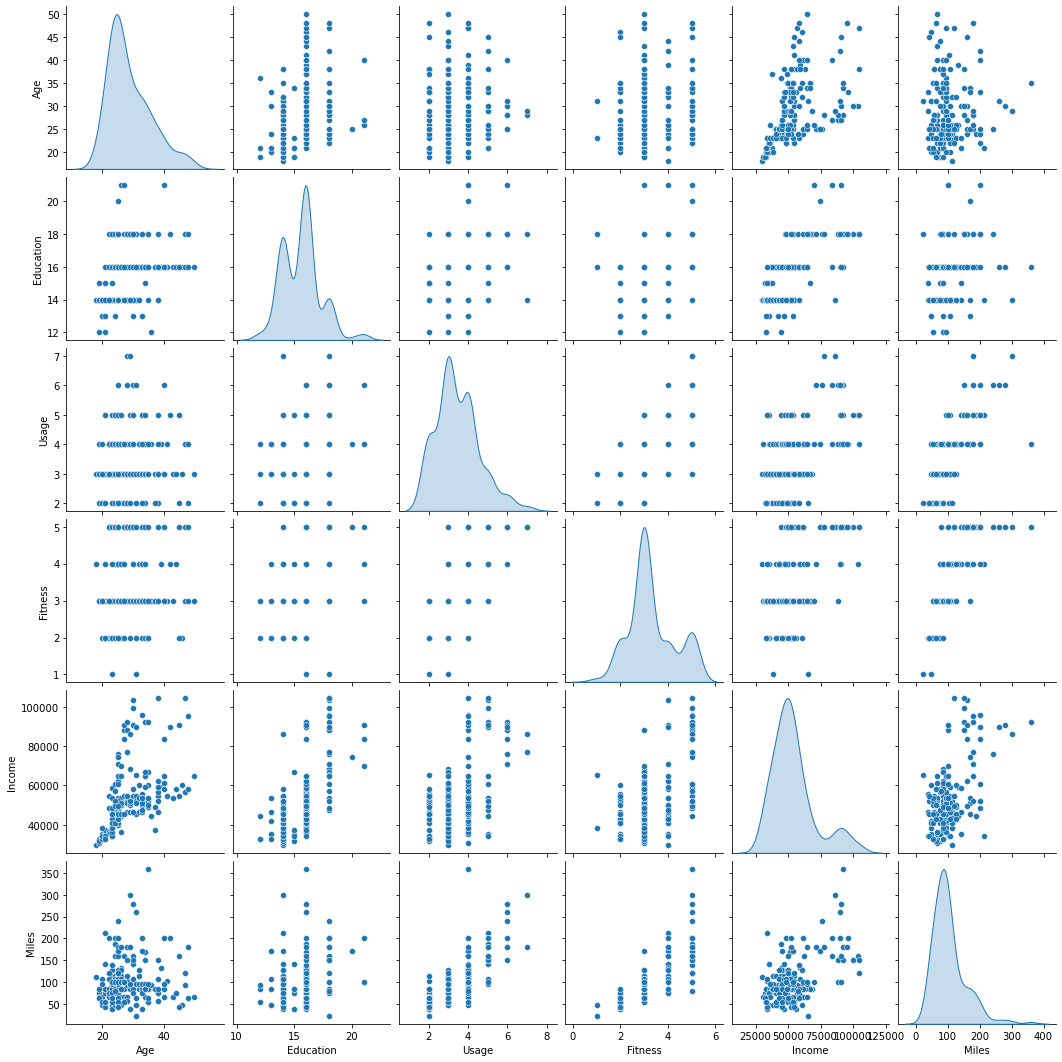

In [61]:
#A multivariate view of the data
sns.pairplot(data=cardio, diag_kind="kde")
plt.show()

# I think the other graphs are more relevant for pulling out a profile...maybe I'm missing something?

In [181]:
#Added marital status to the mean groupby 
df8=cardio.groupby(by=['Product','Gender','MaritalStatus']).mean()
df8.round(2)
#df8.round(2).to_csv('df8.csv',index=True)

Age  Education  Usage  Fitness    Income  \
Product Gender MaritalStatus                                               
TM195   Female Partnered      28.33      14.89   2.85     2.85  46153.78   
               Single         28.69      15.54   3.00     2.92  45742.38   
        Male   Partnered      31.38      15.43   3.29     2.86  50028.00   
               Single         25.63      14.47   3.26     3.26  43265.84   
TM498   Female Partnered      30.00      15.20   3.33     2.93  49724.80   
               Single         28.14      15.21   2.93     2.79  48920.36   
        Male   Partnered      30.38      15.29   2.86     2.90  49378.29   
               Single         25.20      14.50   3.30     3.00  47071.80   
TM798   Female Partnered      29.00      17.50   5.25     5.00  84972.25   
               Single         24.33      18.33   4.67     4.00  58516.00   
        Male   Partnered      30.00      17.42   4.84     4.63  81431.37   
               Single         28.93      16.93   4.57     4.64  68216.43   

                               Miles  
Product Gender MaritalStatus          
TM195   Female Partnered       74.93  
               Single          78.85  
        Male   Partnered       80.19  
               Single          99.53  
TM498   Female Partnered       94.00  
               Single          80.21  
        Male   Partnered       87.24  
               Single          91.10  
TM798   Female Partnered      215.00  
               Single         133.33  
        Male   Partnered      176.32  
               Single         147.57

# The same thoughts here but wanted to add Marital Status for the ppt